<a href="https://www.kaggle.com/code/cindynz/travel-insurance-prediction-capstone-project?scriptVersionId=126088803" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Travel Insurance Prediction Capstone Project

Context:

A Tour & Travels company is offering a new travel insurance package to their customers that includes Covid cover. The company wants to identify which customers would be interested in purchasing the package based on their database history. The given data has been extracted from the performance and sales of the package during the introductory offering held in 2019. The company has provided data for nearly 2000 of its previous customers and you are required to build an intelligent model that can predict if a customer is likely to buy the travel insurance package based on certain parameters. These parameters include the customer's age, employment type, graduate status, annual income, number of family members, chronic diseases, frequent flyer status, whether they have ever traveled abroad, and if they purchased travel insurance during the 2019 introductory offering.



Dataset main features:

- Age - Age Of The Customer

- Employment Type - The Sector In Which Customer Is Employed

- Graduate Status - Whether The Customer Is College Graduate Or Not

- Annual Income - The Yearly Income Of The Customer In Indian Rupees

- Family Size - Number Of Members In Customer's Family

- Presence of Chronic Disease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.

- Frequent Flyer Status - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].

- Travel History - Has The Customer Ever Travelled To A Foreign Country

- Travel Insurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

## Install Package

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC 

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve
from sklearn.metrics import f1_score, precision_score, recall_score

from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [5]:
# Load the dataset
df = pd.read_csv('/kaggle/input/travel-insurance-prediction-data/TravelInsurancePrediction.csv')

In [6]:
# View the first few rows of the dataset
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Exploratory Data Analysis

In [7]:
# Check number of the features
df.columns

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [8]:
# Drop irrelevant columns
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [9]:
# View Descriptive Statitics

print(f"The dataset consists of {df.shape[0]} rows and {df.shape[1]} columns.")
print("Columns of the dataset: ")
print("---"*20)
print(df.info())

The dataset consists of 1987 rows and 9 columns.
Columns of the dataset: 
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB
None


In [10]:
# Check Numerical dataframe statistics
df.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
Age,1987.0,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.0,4.0,5.0,6.0,9.0
ChronicDiseases,1987.0,0.277806,0.448030,0.0,0.0,0.0,1.0,1.0
TravelInsurance,1987.0,0.357323,0.479332,0.0,0.0,0.0,1.0,1.0


In [11]:
# Check Object-type datafram statistics
df.describe(include = 'object').T

,count,unique,top,freq
Employment Type,1987,2,Private Sector/Self Employed,1417
GraduateOrNot,1987,2,Yes,1692
FrequentFlyer,1987,2,No,1570
EverTravelledAbroad,1987,2,No,1607


In [12]:
# Check the unique values of the dataset
df.nunique()

Age                    11
Employment Type         2
GraduateOrNot           2
AnnualIncome           30
FamilyMembers           8
ChronicDiseases         2
FrequentFlyer           2
EverTravelledAbroad     2
TravelInsurance         2
dtype: int64

In [13]:
# Check missing values
print(df.isnull().sum())

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64


In [14]:
# View the shape of the dataset
print(df.shape)

(1987, 9)


## Visualization

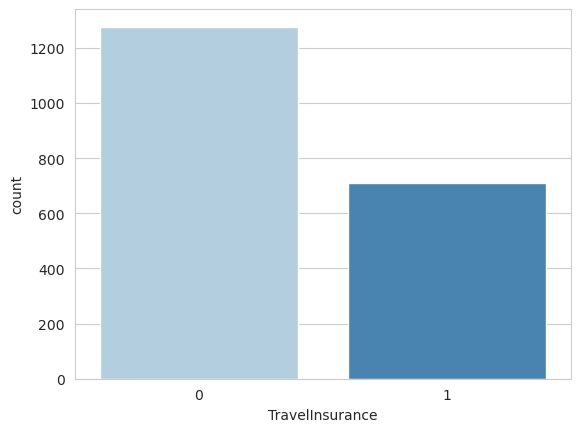

,TravelInsurance
TravelInsurance,
0,1277
1,710


In [15]:
# Visualize the distribution of the target variable

sns.countplot(data=df,x='TravelInsurance',palette="Blues")
plt.show()
df.groupby('TravelInsurance').agg({'TravelInsurance':'count'})

- we have data of more number of people who did not purchase the travel insurance

In [16]:
# Visualize by travel insurance and count number of customers

labels = ['Not Purchased', 'Purchased']
values = df['TravelInsurance'].value_counts()

fig = px.pie(df, names=labels, values=values, color_discrete_sequence=['lightblue', 'lightpink'], 
             title='How many people have purchased the insurance?', template='plotly_white')

fig.show()

- Findings: 35.7% of people have bought the travel insurance; 64.3% of people have not bought the travel insurance.

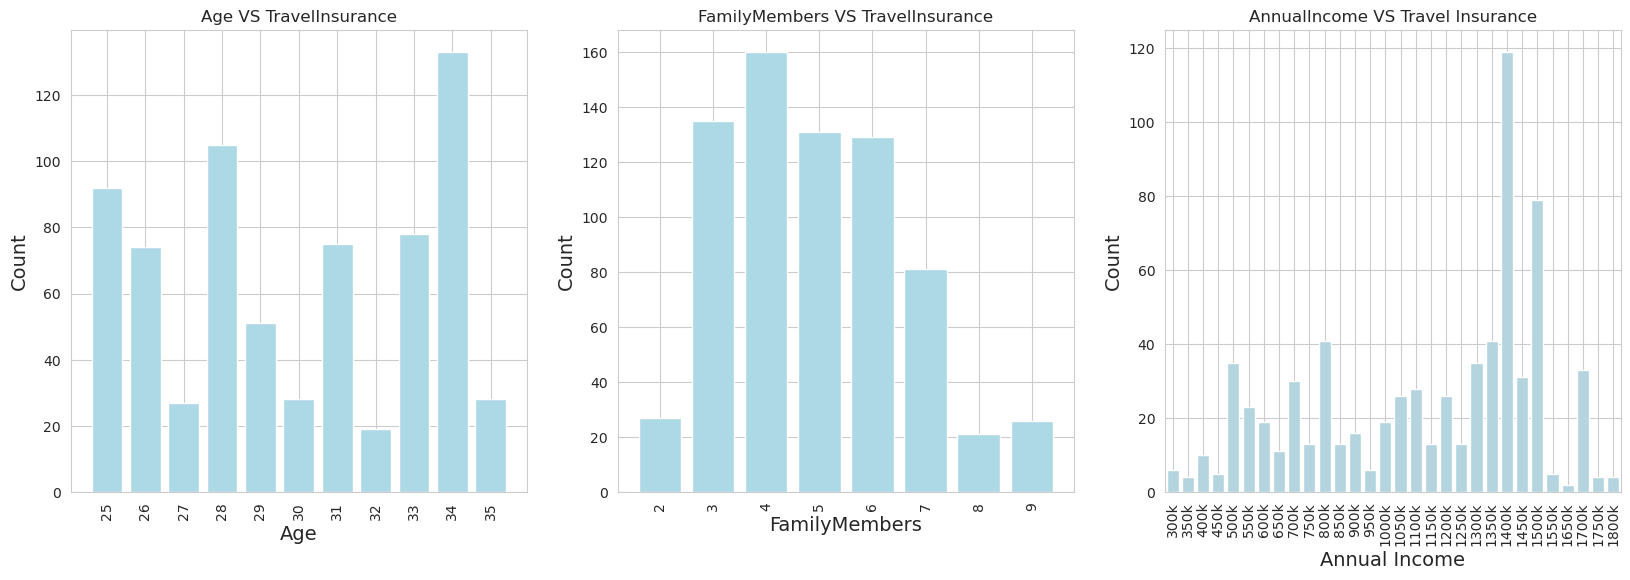

In [17]:
# Visualize Travel Insurance vs Age & Travel Insurance vs FamilyMembers & Travel Insurance vs Annual Income

from matplotlib.ticker import FuncFormatter

# Define variables to plot
variables = [('TravelInsurance', 'Age'),
             ('TravelInsurance', 'FamilyMembers'), 
             ('TravelInsurance', 'AnnualIncome')]

# Define colors for bar graphs
colors = ['lightblue']

# Create a figure with 1 row and 3 columns of subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Iterate over each pair of variables and create a subplot for each
for i, (x_var, y_var) in enumerate(variables):
    # Group data by x_var and count the number of customers who purchased travel insurance
    purchase_count = df[df['TravelInsurance'] == 1].groupby(y_var)['TravelInsurance'].count()

    # Create bar graph
    axs[i].bar(purchase_count.index, purchase_count.values, color=colors)
    axs[i].set_title(f'{y_var} VS {x_var}')
    axs[i].set_xlabel(y_var, fontsize=14)
    axs[i].set_ylabel('Count', fontsize=14)
    axs[i].grid(True) # Set grid to True

    # Set x-tick labels
    axs[i].set_xticks(purchase_count.index)
    axs[i].set_xticklabels(purchase_count.index)
    # rotate x-tick labels
    plt.setp(axs[i].get_xticklabels(), rotation=90)

# create countplot for Annual Income
ax = sns.countplot(data=df[df['TravelInsurance']==1], x='AnnualIncome', color='lightblue')

# set grid to True
ax.grid(True)

# remove y-axis label
ax.set(ylabel=None)

# set plot title and labels
plt.title('AnnualIncome VS Travel Insurance')
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Count', fontsize=14)

# format y-axis tick labels with commas
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

# adjust x-tick labels
tick_labels = ax.get_xticklabels()
new_tick_labels = [f'{int(float(label.get_text()))/1000:.0f}k' for label in tick_labels]
ax.set_xticklabels(new_tick_labels)

# rotate x-tick labels
plt.xticks(rotation=90)

# display plot
plt.show()

# display plot
plt.show()


Findings:

 - Age : 34 years old highest purchase; 27, 30, 32 years old are lowest purchase of all ages.
 
 - Family Members : family with 4 members highest purchase.
 
 - Annual Income : 1400K Rupees Income highest purchase.

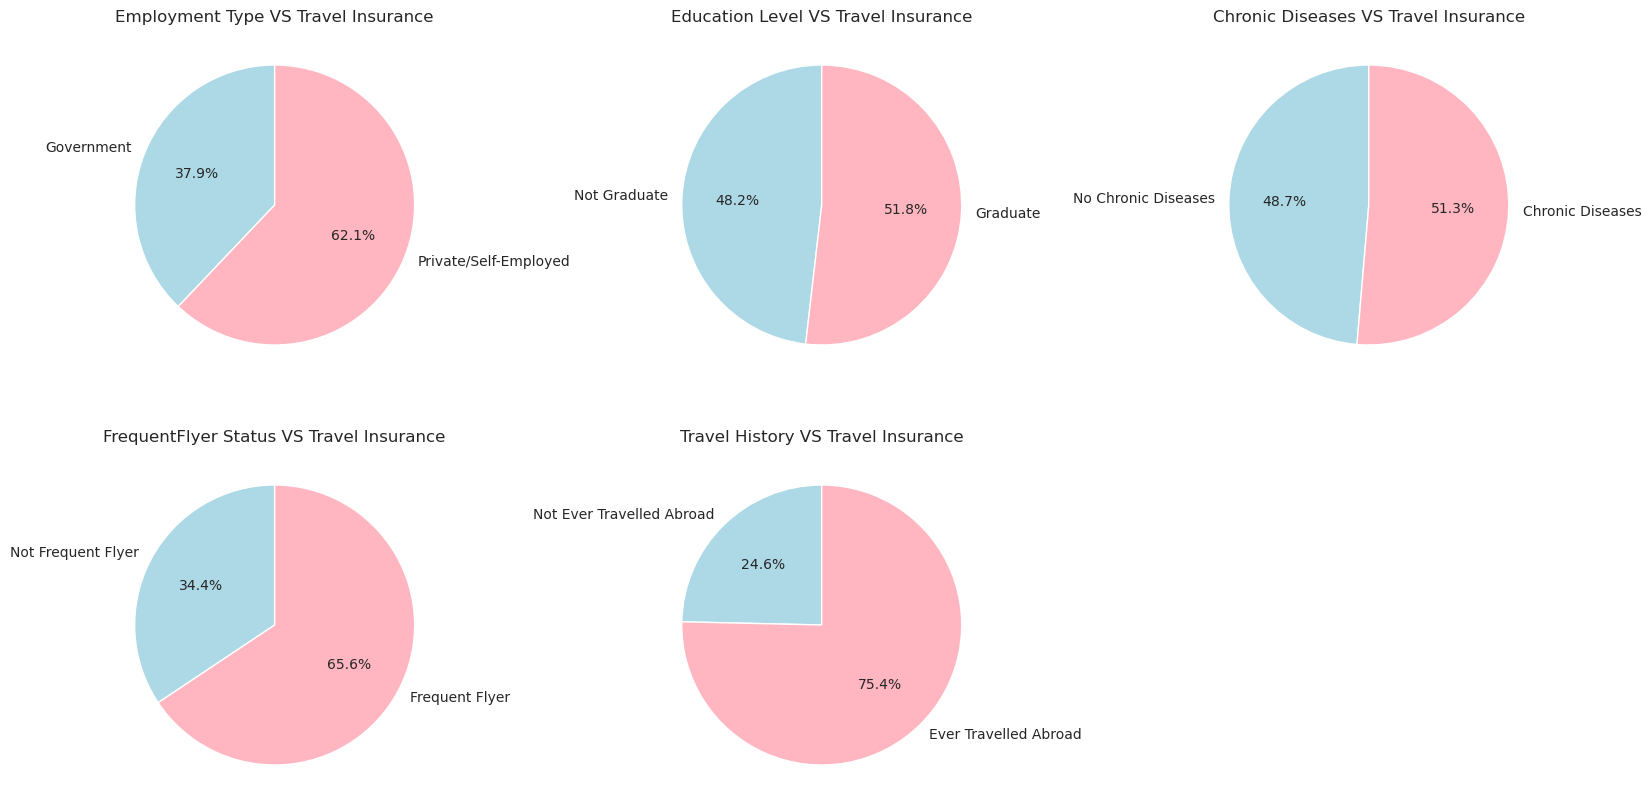

In [18]:
# Visualize Travel Insurance vs Employment type & Travel Insurance vs GraduateOrNot & Travel Insurance vs ChronicDiseases & Travel Insurance vs Frequent flyer & Travel Insurance vs Ever travel abroad

# group data by employment type and calculate percentage of customers who purchased travel insurance
employmenttype_purchase_pct = (df.groupby('Employment Type').sum()['TravelInsurance'] / df.groupby('Employment Type').count()['TravelInsurance']) * 100

# group data by graduateornot and calculate percentage of customers who purchased travel insurance
graduateornot_purchase_pct = (df.groupby('GraduateOrNot').sum()['TravelInsurance'] / df.groupby('GraduateOrNot').count()['TravelInsurance']) * 100

# group data by chronicdiseases and calculate percentage of customers who purchased travel insurance
chronicdiseases_purchase_pct = (df.groupby('ChronicDiseases').sum()['TravelInsurance'] / df.groupby('ChronicDiseases').count()['TravelInsurance']) * 100

# group data by frequentflyer and calculate percentage of customers who purchased travel insurance
frequentflyer_purchase_pct = (df.groupby('FrequentFlyer').sum()['TravelInsurance'] / df.groupby('FrequentFlyer').count()['TravelInsurance']) * 100

# group data by evertravelabroad and calculate percentage of customers who purchased travel insurance
evertravelabroad_purchase_pct = (df.groupby('EverTravelledAbroad').sum()['TravelInsurance'] / df.groupby('EverTravelledAbroad').count()['TravelInsurance']) * 100

# define colors for pie chart
colors = ['lightblue', 'lightpink']
labels = ['Government', 'Private/Self-Employed']


# create figure with 2 rows and 3 columns of subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# create pie chart for employment type
axs[0][0].pie(employmenttype_purchase_pct.values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axs[0][0].set_title('Employment Type VS Travel Insurance')

# create pie chart for graduateornot
axs[0][1].pie(graduateornot_purchase_pct.values, labels=['Not Graduate', 'Graduate'], autopct='%1.1f%%', startangle=90, colors=colors)
axs[0][1].set_title('Education Level VS Travel Insurance')

# create pie chart for chronicdiseases
axs[0][2].pie(chronicdiseases_purchase_pct.values, labels=['No Chronic Diseases', 'Chronic Diseases'], autopct='%1.1f%%', startangle=90, colors=colors)
axs[0][2].set_title('Chronic Diseases VS Travel Insurance')

# create pie chart for frequentflyer
axs[1][0].pie(frequentflyer_purchase_pct.values, labels=['Not Frequent Flyer', 'Frequent Flyer'], autopct='%1.1f%%', startangle=90, colors=colors)
axs[1][0].set_title('FrequentFlyer Status VS Travel Insurance')

# create pie chart for evertravelabroad
axs[1][1].pie(evertravelabroad_purchase_pct.values, labels=['Not Ever Travelled Abroad', 'Ever Travelled Abroad'], autopct='%1.1f%%', startangle=90, colors=colors)
axs[1][1].set_title('Travel History VS Travel Insurance')

# remove the last subplot as there are only 5 variables to plot
fig.delaxes(axs[1][2])

plt.show()


- Findings:

 - Employment Type : In the private sector, the percentage of people who purchase travel insurance is over 62.1%, whereas in the government sector it is 37.9%.
 
 - Education Level : Graduates purchase travel insurance over 51.8% while non-graduates purchase it around 48.2%.
 
 - Chronic Diseases : 48.7% of those without Chronic Diseases purchase travel insurance, while in the group with Chronic Diseases, that number increases to 51.3%.
 
 - Frequent Flyer status : 34.4% of the non-frequent flyers purchase travel insurance, while in the other group that number increases to 65.6%.
 
 - Travel History : 24.6% of those who have never traveled abroad purchase travel insurance, while in the other group that number increases to 75.4%.

## Encoding categorical data

In [19]:
# Covert categorical to numerics

df['Employment Type']=df['Employment Type'].map({'Private Sector/Self Employed':1,'Government Sector':0})
df['GraduateOrNot']=df['GraduateOrNot'].map({'Yes':1,'No':0})
df['FrequentFlyer']=df['FrequentFlyer'].map({'Yes':1,'No':0})
df['EverTravelledAbroad']=df['EverTravelledAbroad'].map({'Yes':1,'No':0})

In [20]:
# Descriptive Statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1987.0,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
Employment Type,1987.0,0.713135,0.452412,0.0,0.0,1.0,1.0,1.0
GraduateOrNot,1987.0,0.851535,0.355650,0.0,1.0,1.0,1.0,1.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.0,4.0,5.0,6.0,9.0
ChronicDiseases,1987.0,0.277806,0.448030,0.0,0.0,0.0,1.0,1.0
FrequentFlyer,1987.0,0.209864,0.407314,0.0,0.0,0.0,0.0,1.0
EverTravelledAbroad,1987.0,0.191243,0.393379,0.0,0.0,0.0,0.0,1.0
TravelInsurance,1987.0,0.357323,0.479332,0.0,0.0,0.0,1.0,1.0


In [21]:
# Check correlation between different features
df.corr()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
Age,1.000000,-0.115134,0.027125,-0.020101,0.027409,0.007359,-0.033159,-0.012779,0.061060
Employment Type,-0.115134,1.000000,-0.127133,0.349157,-0.003354,-0.011553,0.143790,0.181098,0.147847
GraduateOrNot,0.027125,-0.127133,1.000000,0.108066,0.021201,0.018811,-0.028120,0.062683,0.018934
AnnualIncome,-0.020101,0.349157,0.108066,1.000000,-0.015367,-0.001149,0.353087,0.486043,0.396763
FamilyMembers,0.027409,-0.003354,0.021201,-0.015367,1.000000,0.028209,-0.023775,-0.020755,0.079909
ChronicDiseases,0.007359,-0.011553,0.018811,-0.001149,0.028209,1.000000,-0.043720,0.021238,0.018190
FrequentFlyer,-0.033159,0.143790,-0.028120,0.353087,-0.023775,-0.043720,1.000000,0.277334,0.232103
EverTravelledAbroad,-0.012779,0.181098,0.062683,0.486043,-0.020755,0.021238,0.277334,1.000000,0.433183
TravelInsurance,0.061060,0.147847,0.018934,0.396763,0.079909,0.018190,0.232103,0.433183,1.000000


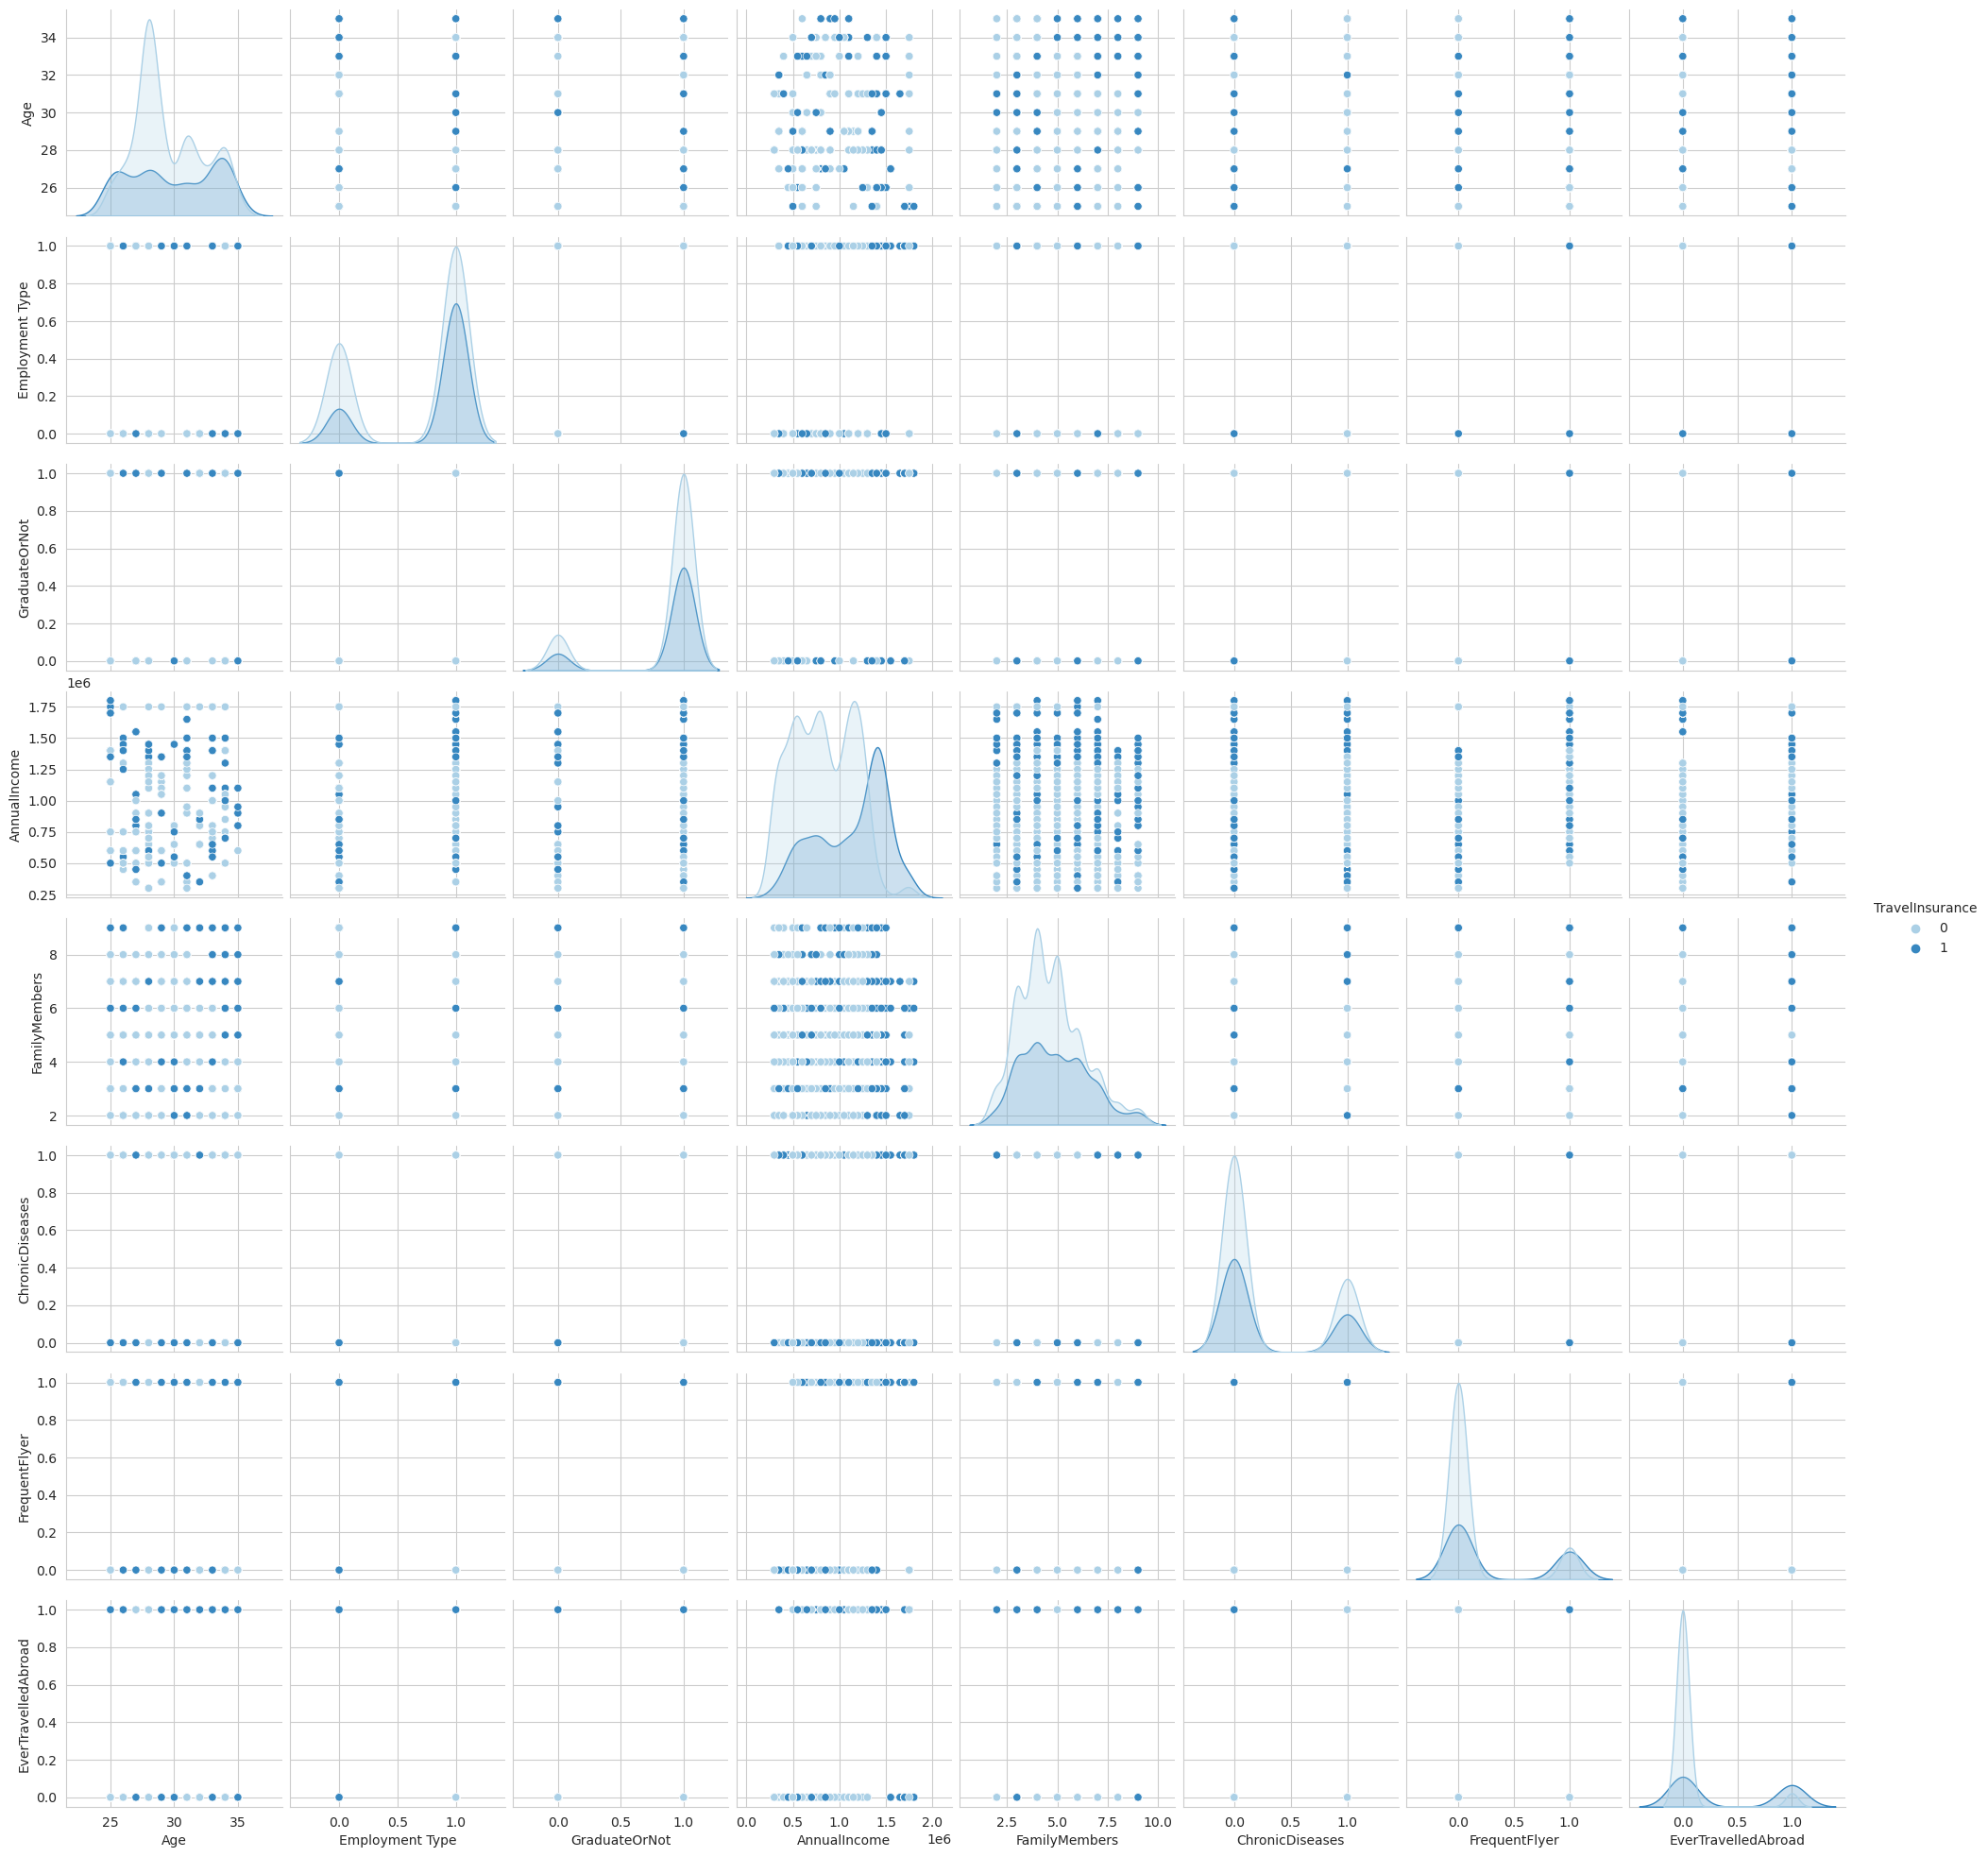

In [22]:
# Pairplot show the correlation of the data

g = sns.pairplot(df, hue="TravelInsurance", palette="Blues")

### Correlation matrix: 

- Table of correlation coefficients between variables, used in statistics to identify relationships and patterns. Coefficients range from -1 to +1, indicating strength and direction of linear relationship between variables.

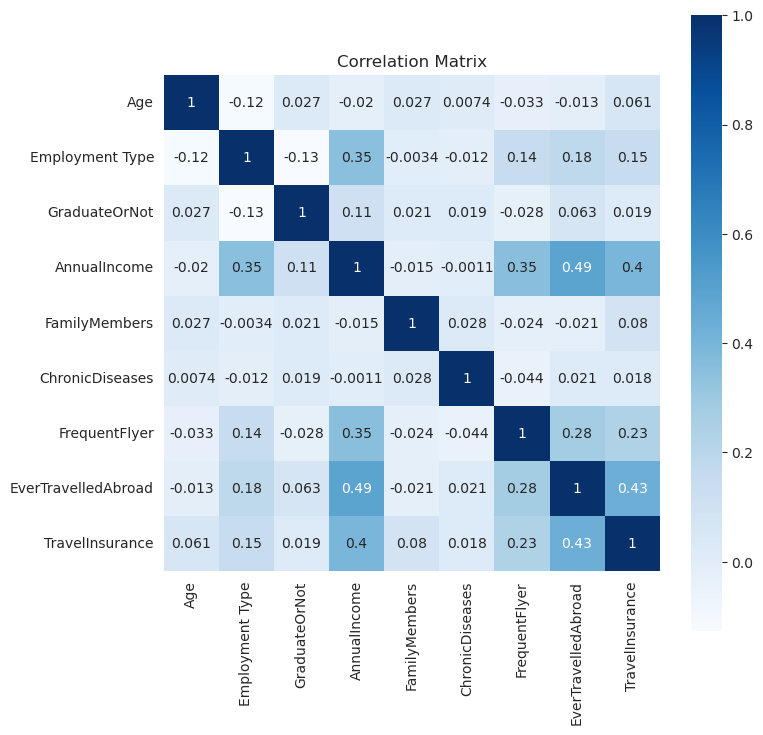

In [23]:
# Plot a heatmap of the correlation of the data

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(), square=True, annot=True, cmap="Blues")
plt.title('Correlation Matrix')
plt.show()

- Findings:

 - TravelInsurance with EverTravelledAbroad, AnnualIncome and FrequentFlyer have a strong positive relationship

## Check data distribution

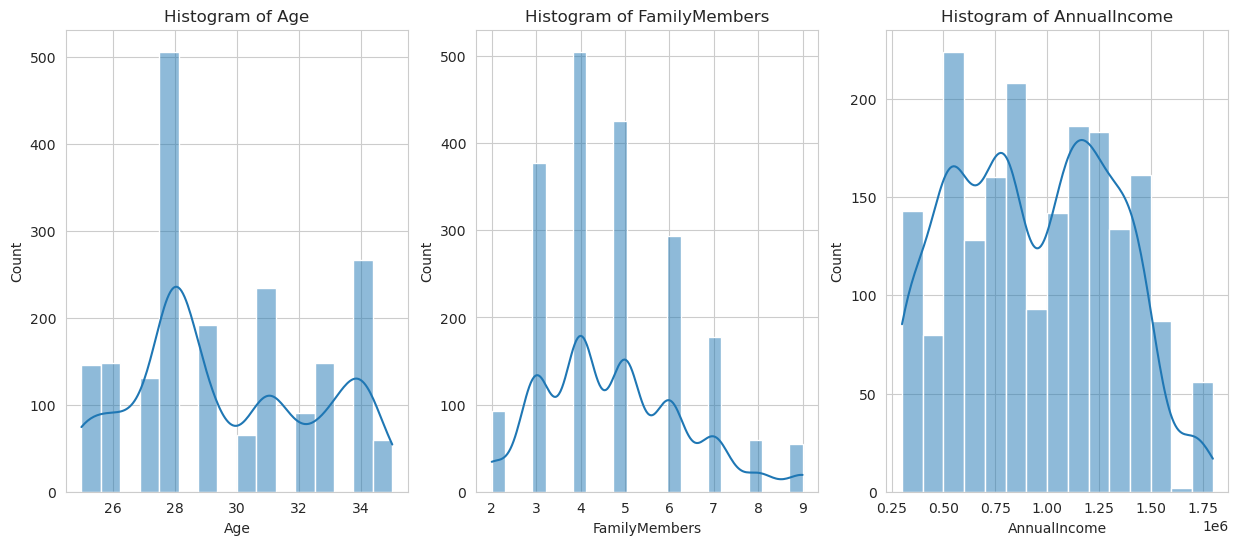

In [24]:
# Create histogram plots for 'Age', 'FamilyMembers', and 'AnnualIncome'

plt.figure(figsize=(15,6))
for i, col in enumerate(['Age', 'FamilyMembers', 'AnnualIncome']):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
plt.show()


- Findings: Based on the graph, the type of data distribution on the numerical features tends to be normal

## Check outlier

In [25]:
# Calculate the z-scores for each numerical column
z_scores = np.abs((df.select_dtypes(include=np.number)) - df.select_dtypes(include=np.number).mean()) / df.select_dtypes(include=np.number).std()

# Identify any values with z-score greater than 3
potential_outliers = df[(z_scores > 3).any(axis=1)]

# Print the potential outliers
print(potential_outliers)


Empty DataFrame
Columns: [Age, Employment Type, GraduateOrNot, AnnualIncome, FamilyMembers, ChronicDiseases, FrequentFlyer, EverTravelledAbroad, TravelInsurance]
Index: []


Findings: There are no potential outliers in the dataset.

### Feature Selection 
 - process of selecting a subset of relevant features or variables from a larger set of data, based on their importance in predicting or explaining an outcome.

In [26]:
# Define the target value(dependant variable) as y

X = df.drop('TravelInsurance',axis=1)
y = df['TravelInsurance']

In [27]:
# Check the shape of input data

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1987, 8)
y shape: (1987,)


### Train/Test split

In [28]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the resulting training and testing sets

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1589, 8)
X_test shape: (398, 8)
y_train shape: (1589,)
y_test shape: (398,)


In [29]:
# Always good to set a seed for reproducibility

SEED = 100
np.random.seed(SEED)

- By setting a seed, we can ensure that the results we obtain from the analysis or model are consistent and reproducible every time we run the code.

## Building the Model

Supervised Machine Learning:

 1. Logistic Regression (LR)

 2. Decision Tree (DT)

 3. Random Forest (RF)
 
 4. K-Nearest Neighbor (KNN)

 5. Naive Bayes (NB)

 6. Support Vector Machines (SVC)

### Spot-Check Algorithms

- Spot-check algorithms refer to a technique in machine learning where a range of different models are quickly trained and evaluated on a given dataset.

- This approach allows for the rapid evaluation of various algorithms to determine which ones may perform well on a particular problem. 

- The goal of spot-checking is not to identify the best possible model but rather to find a handful of promising models that can be further tuned and compared in more detail.

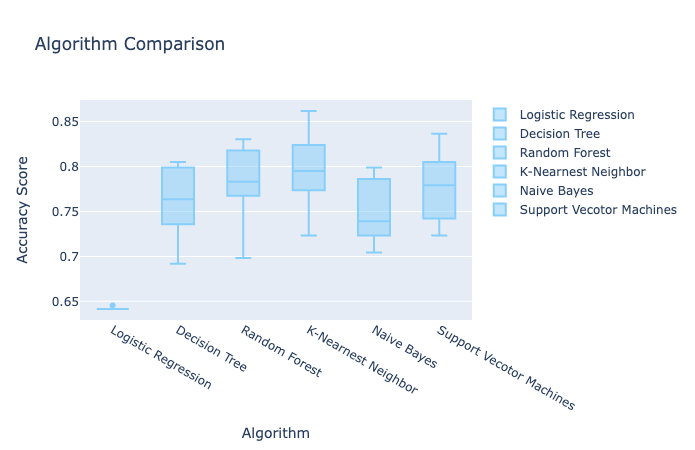

,Model,Accuracy Score
0,Logistic Regression,0.6419
1,Decision Tree,0.7615
2,Random Forest,0.7816
3,K-Nearnest Neighbor,0.7974
4,Naive Bayes,0.7502
5,Support Vecotor Machines,0.7747


In [30]:
# Spot-Check Algorithms

def GetBasedModel():
    basedModels = []
    basedModels.append(('Logistic Regression' , LogisticRegression()))
    basedModels.append(('Decision Tree' , DecisionTreeClassifier()))
    basedModels.append(('Random Forest' , RandomForestClassifier()))
    basedModels.append(('K-Nearnest Neighbor' , KNeighborsClassifier()))
    basedModels.append(('Naive Bayes'  , GaussianNB()))
    basedModels.append(('Support Vecotor Machines' , SVC()))

    
    return basedModels

def BasedLine(X_train, y_train, models):
# Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=42, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
       
        
    return names, results

class PlotBoxR(object):
    def __init__(self):
        py.init_notebook_mode(connected=True)
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name=nameOfFeature,
            marker=dict(
                color='rgb(135, 206, 250)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))
    
        layout = go.Layout(title="Algorithm Comparison",
                           yaxis=dict(title="Accuracy Score"),
                           xaxis=dict(title="Algorithm"))

        fig = go.Figure(data=data, layout=layout)
        py.iplot(fig)
        
models = GetBasedModel()
names,results = BasedLine(X_train, y_train, models)
PlotBoxR().PlotResult(names,results)

def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Accuracy Score': scores})
    return scoreDataFrame

basedLineScore = ScoreDataFrame(names,results)
basedLineScore

- Findings: 
  
  - The KNN model achieved the highest baseline score of 0.7911, indicating that it provided the best performance among all the models tested. 
  
  - The Random Forest (RF) and Support Vector Classifier (SVC) models also demonstrated good performance, ranking in the top three models evaluated.

## Feature Scaling

- StandardScaler and MinMaxScaler are two popular methods for scaling features in machine learning.

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def GetScaledModel(nameOfScaler):

    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR' , Pipeline([('Scaler', scaler),('LR' , LogisticRegression())])))
    pipelines.append((nameOfScaler+'DT' , Pipeline([('Scaler', scaler),('DT' , DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'RF' , Pipeline([('Scaler', scaler),('RF' , RandomForestClassifier())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'NB' , Pipeline([('Scaler', scaler),('NB' , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVC' , Pipeline([('Scaler', scaler),('SVC' , SVC())])))


    return pipelines 

### Standard

- StandardScaler scales the data by subtracting the mean and dividing by the standard deviation. This method transforms the data to have a mean of zero and a standard deviation of one. 

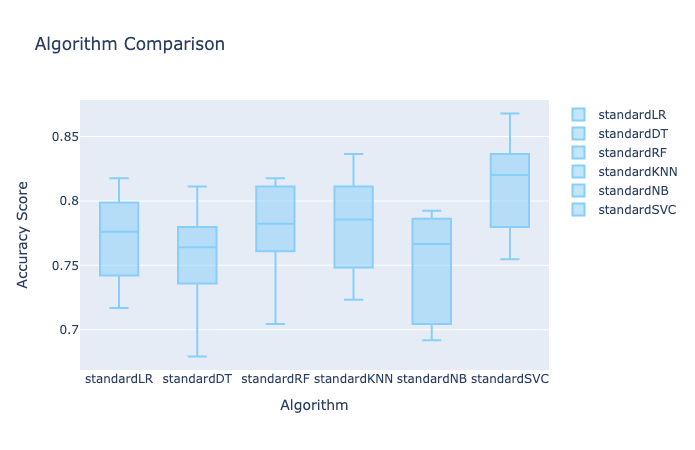

,Model,Accuracy Score,Model,Accuracy Score
0,Logistic Regression,0.6419,standardLR,0.7716
1,Decision Tree,0.7615,standardDT,0.7590
2,Random Forest,0.7816,standardRF,0.7760
3,K-Nearnest Neighbor,0.7974,standardKNN,0.7835
4,Naive Bayes,0.7502,standardNB,0.7483
5,Support Vecotor Machines,0.7747,standardSVC,0.8106


In [32]:
models = GetScaledModel('standard')
names,results = BasedLine(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

- Findings: After StandardScaler, Logistic Regression and Support Vector Machines had been improved.

### MinMax

- MinMaxScaler scales the data by subtracting the minimum value and dividing by the range of the data. This method transforms the data to be between zero and one.

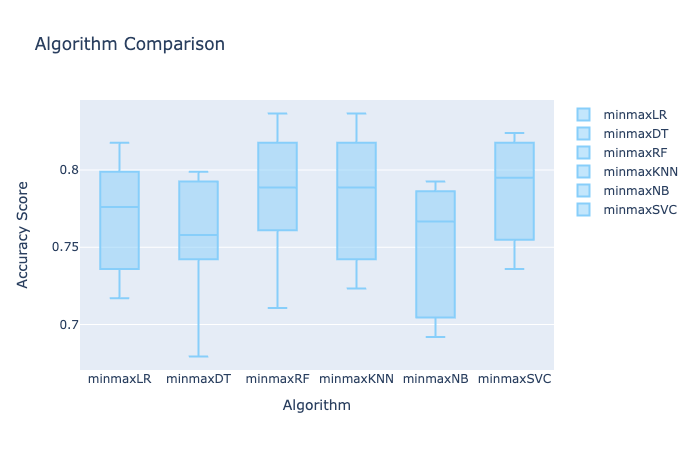

,Model,Accuracy Score,Model,Accuracy Score,Model,Accuracy Score
0,Logistic Regression,0.6419,standardLR,0.7716,minmaxLR,0.7709
1,Decision Tree,0.7615,standardDT,0.7590,minmaxDT,0.7590
2,Random Forest,0.7816,standardRF,0.7760,minmaxRF,0.7848
3,K-Nearnest Neighbor,0.7974,standardKNN,0.7835,minmaxKNN,0.7816
4,Naive Bayes,0.7502,standardNB,0.7483,minmaxNB,0.7483
5,Support Vecotor Machines,0.7747,standardSVC,0.8106,minmaxSVC,0.7854


In [33]:
models = GetScaledModel('minmax')
names,results = BasedLine(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

- Findings: After MinMaxScaler, Logistic Regression, Random Forest and Support Vector Machines had been improved.

## Model evaluation and optimization

 - The process of assessing the accuracy and effectiveness of a predictive model and refining the model to improve its performance.
 
 - This process involves evaluating the model's performance using performance metrics such as accuracy, precision, recall, F1 score, ROC curve, and AUC.

 - Adjustments are made to the model's design or parameters to improve its performance based on the results of the evaluation.

 - Techniques such as cross-validation and hyperparameter tuning may be used to optimize the model.

 - The model may be re-evaluated after each round of optimization to assess its performance and identify areas for further improvement.




 - The summary report includes metrics such as precision, recall, F1-score, and support for each class, as well as an overall accuracy score. They are all common performance metrics used in machine learning for evaluating the effectiveness of classification models.
 
  - Precision: Measures the proportion of true positive predictions among all positive predictions.

  - Recall: Measures the proportion of true positive predictions among all actual positive cases.

  - F1-score: A weighted average of precision and recall that provides a single score summarizing the model's performance.

  - Support: The number of actual cases in each class of the classification problem.

  - Accuracy score: Measures the proportion of correct predictions made by the model among all predictions made.
  
 - Calculate the ROC AUC score to evaluate the overall performance of the model. Use the ROC curve to visualize the trade-off between true positive rate (TPR) and false positive rate (FPR) for different classification thresholds.
  
  - A model with a high ROC AUC score and a curve that hugs the top-left corner of the plot indicates high performance.

 - Use the information from the ROC AUC and summary report to optimize the model by adjusting hyperparameters, feature selection, or other aspects of the modeling process.

In [34]:
# Standarization - scale the data (X_train & X_test)
from sklearn import preprocessing

X_train = preprocessing.scale(X_train)

X_test = preprocessing.scale(X_test)

In [35]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

if not os.path.exists('show_summary_report'):
    os.mkdir('show_summary_report')

# Verify and Evaluate the Training Model
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(float)
    prediction_int = np.round(prediction)

    print('Accuracy : %.2f [TP / N]         Best: 1, Worst: 0' %
          accuracy_score(actual, prediction_int))
    msg = '           Proportion of predicted labels that match the true labels.'
    print(msg)
    print('Precision: %.2f [TP / (TP + FP)] Best: 1, Worst: 0' %
          precision_score(actual, prediction_int))
    msg = '           Not to label a negative sample as positive.'
    print(msg)
    print('Recall   : %.2f [TP / (TP + FN)] Best: 1, Worst: 0' %
          recall_score(actual, prediction_int))
    msg = '           Find all the positive samples.'
    print(msg)
    print('ROC AUC  : %.2f                  Best: 1, Worst: < 0.5' %
          roc_auc_score(actual, prediction))
    print('-' * 80)
    print('TP: True Positives, FP: False Positives,')
    print('TN: True Negatives, FN: False Negatives,')
    print('N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction_int)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    fig.subplots_adjust(left=0.02, right=0.98, wspace=0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square=True, annot=True, fmt='d',
                cbar=False, cmap='Blues', ax=ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')

    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color='b', alpha=0.2, where='post')
    ax[1].fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
                   
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color='darkorange', lw=2,
               label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc='lower right')

    plt.show()
    
"if name == 'main':"
    

"if name == 'main':"

### 1. Logistic Regression

- C : Regularization value, the more, the stronger the regularization(double).

- RegularizationType: Can be either "L2" or “L1”. Default is “L2”.

In [36]:
# Define the logistic regression model
lr = LogisticRegression(solver='liblinear', max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Logistic regression accuracy:', round(accuracy, 4))
print('Logistic regression confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Logistic regression classification report:\n', classification_report(y_test, y_pred))

Logistic regression accuracy: 0.7688
Logistic regression confusion matrix:
 [[236  21]
 [ 71  70]]
Logistic regression classification report:
               precision    recall  f1-score   support

           0       0.77      0.92      0.84       257
           1       0.77      0.50      0.60       141

    accuracy                           0.77       398
   macro avg       0.77      0.71      0.72       398
weighted avg       0.77      0.77      0.75       398



In [37]:
# Define the hyperparameter grid to search over
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [1, 10, 100]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_lr = GridSearchCV(lr, lr_params, cv=5)
grid_lr.fit(X_train, y_train)
lr_best = grid_lr.best_estimator_

# Print the best hyperparameters and score found during the grid search
print("Best parameters:", lr_best)
print("Best Accuracy Score: {:.2f}%".format(grid_lr.best_score_ * 100))

Best parameters: LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='liblinear')
Best Accuracy Score: 76.78%


Accuracy : 0.77 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.77 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.50 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.74                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


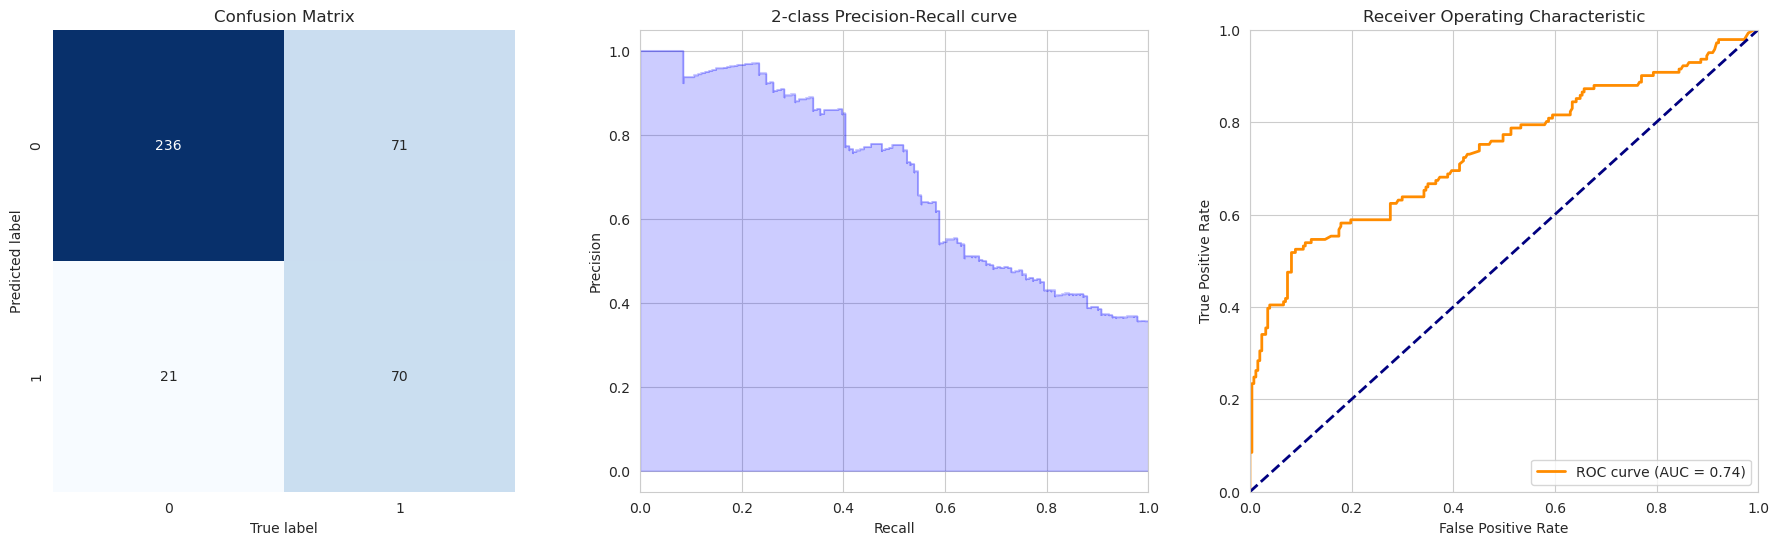

In [38]:
# Train the logistic regression model on the training data with the best hyperparameters found
lr_best.fit(X_train, y_train)

# Generate predicted probabilities of the positive class for the testing data
pred_lr = lr_best.predict_proba(X_test)[:, 1]

# Print a summary report of the model's performance on the testing data
show_summary_report(y_test, pred_lr)   

### 2. Decision Tree

- max_depth: Maximum depth of the tree (double).

- row_subsample: Proportion of observations to consider (double).

- max_features: Proportion of columns (features) to consider in each level (double).

In [39]:
# Define the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Decision tree accuracy:', round(accuracy, 4))
print('Decision tree confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Decision tree classification report:\n', classification_report(y_test, y_pred))

Decision tree accuracy: 0.809
Decision tree confusion matrix:
 [[229  28]
 [ 48  93]]
Decision tree classification report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       257
           1       0.77      0.66      0.71       141

    accuracy                           0.81       398
   macro avg       0.80      0.78      0.78       398
weighted avg       0.81      0.81      0.81       398



In [40]:
# Define the hyperparameter grid to search over
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_dt = GridSearchCV(dt, dt_params, cv=5)
grid_dt.fit(X_train, y_train)
dt_best = grid_dt.best_estimator_

# Print the best hyperparameters and score found during the grid search
print("Best parameters:", dt_best)
print("Best Accuracy Score: {:.2f}%".format(grid_dt.best_score_ * 100))

Best parameters: DecisionTreeClassifier(max_depth=4, min_samples_leaf=4)
Best Accuracy Score: 83.01%


Accuracy : 0.84 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.99 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.56 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.80                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


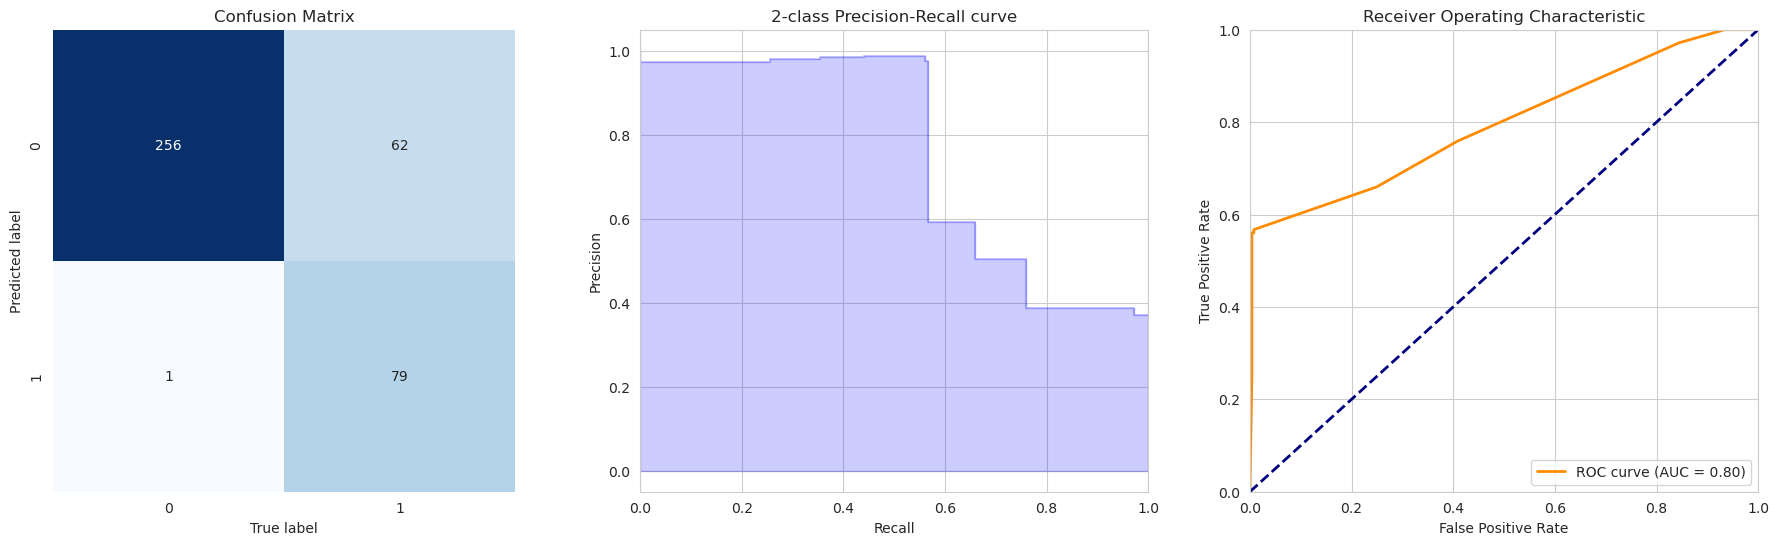

In [41]:
# Train the decision tree model on the training data with the best hyperparameters found
dt_best.fit(X_train, y_train)

# Generate predicted probabilities of the positive class for the testing data
pred_dt = dt_best.predict_proba(X_test)[:, 1]

# Print a summary report of the model's performance on the testing data
show_summary_report(y_test, pred_dt)

### 3. Random Forest

- n_estimators: The number of trees in the forest.

- max_depth: The maximum depth of the tree.

- max_features: The number of features to consider when looking for the best split.

In [42]:
# Define the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Random forest accuracy:', round(accuracy, 4))
print('Random forest confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Random forest classification report:\n', classification_report(y_test, y_pred))

Random forest accuracy: 0.809
Random forest confusion matrix:
 [[232  25]
 [ 51  90]]
Random forest classification report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       257
           1       0.78      0.64      0.70       141

    accuracy                           0.81       398
   macro avg       0.80      0.77      0.78       398
weighted avg       0.81      0.81      0.80       398



In [43]:
# Define the hyperparameter grid to search over
rf_params = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [5, 10, 15], 
    'min_samples_split': [2, 5, 10]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_rf = GridSearchCV(rf, rf_params, cv=5)
grid_rf.fit(X_train, y_train)
rf_best = grid_rf.best_estimator_

# Print the best hyperparameters and score found during the grid search
print("Best parameters:", rf_best)
print("Best Accuracy Score: {:.2f}%".format(grid_rf.best_score_ * 100))

Best parameters: RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200)
Best Accuracy Score: 83.07%


Accuracy : 0.85 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.99 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.57 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.80                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


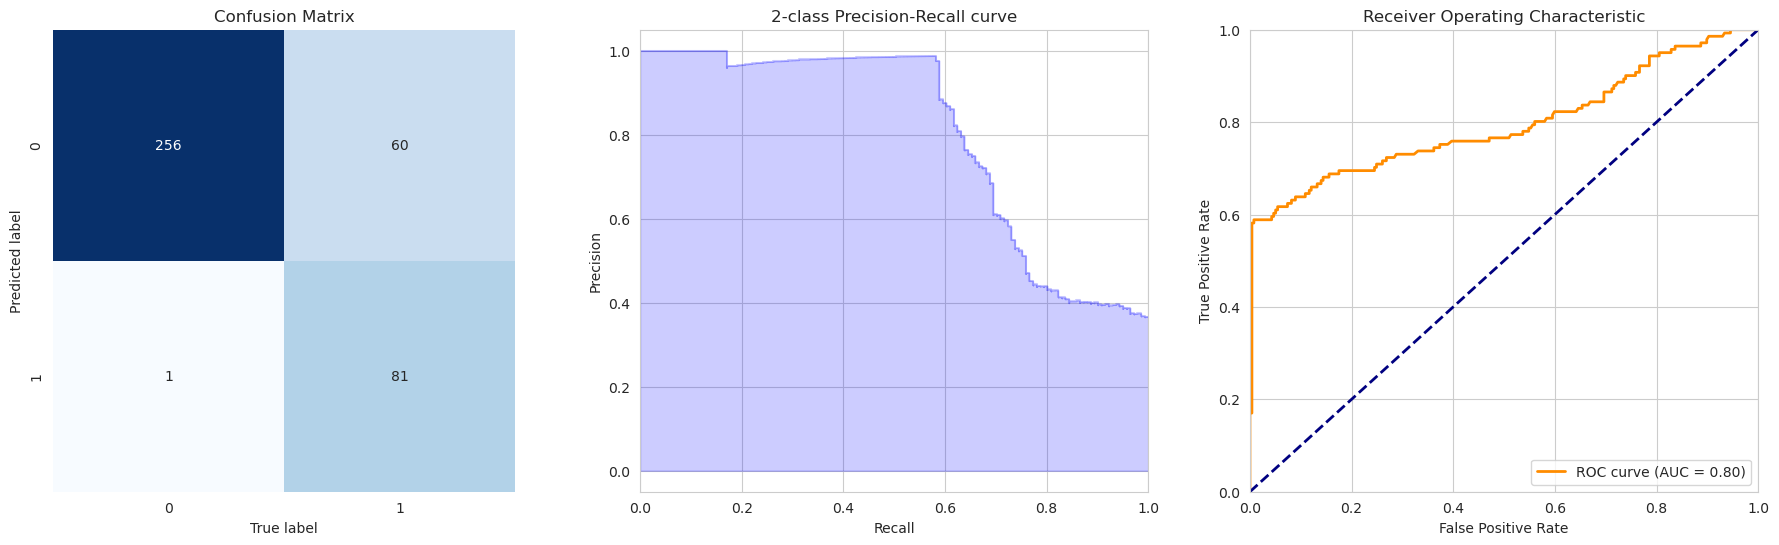

In [44]:
# Train the random forest model on the training data with the best hyperparameters found
rf_best.fit(X_train, y_train)

# Generate predicted probabilities of the positive class for the testing data
pred_rf = rf_best.predict_proba(X_test)[:, 1]

# Print a summary report of the model's performance on the testing data
show_summary_report(y_test, pred_rf)

### 4. K-Nearest Neighbor (KNN)

- n_neighbors: Number of neighbors to use by default for k_neighbors queries

In [45]:
# Define the K-Nearest Neighbor (KNN) model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('K-Nearest Neighbor accuracy:', round(accuracy, 4))
print('K-Nearest Neighbor confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('K-Nearest Neighbor classification report:\n', classification_report(y_test, y_pred))

K-Nearest Neighbor accuracy: 0.7563
K-Nearest Neighbor confusion matrix:
 [[223  34]
 [ 63  78]]
K-Nearest Neighbor classification report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       257
           1       0.70      0.55      0.62       141

    accuracy                           0.76       398
   macro avg       0.74      0.71      0.72       398
weighted avg       0.75      0.76      0.75       398



In [46]:
# Define the hyperparameter grid to search over
knn_params = {'n_neighbors': range(1, 31)}

# Perform grid search cross-validation to find the best hyperparameters
grid_knn = GridSearchCV(knn, knn_params, cv=5)
grid_knn.fit(X_train, y_train)
knn_best = grid_knn.best_estimator_

# Print the best hyperparameters and score found during the grid search
print("Best parameters:", knn_best)
print("Best Accuracy Score: {:.2f}%".format(grid_knn.best_score_ * 100))

Best parameters: KNeighborsClassifier(n_neighbors=4)
Best Accuracy Score: 79.30%


Accuracy : 0.79 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.80 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.52 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.73                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


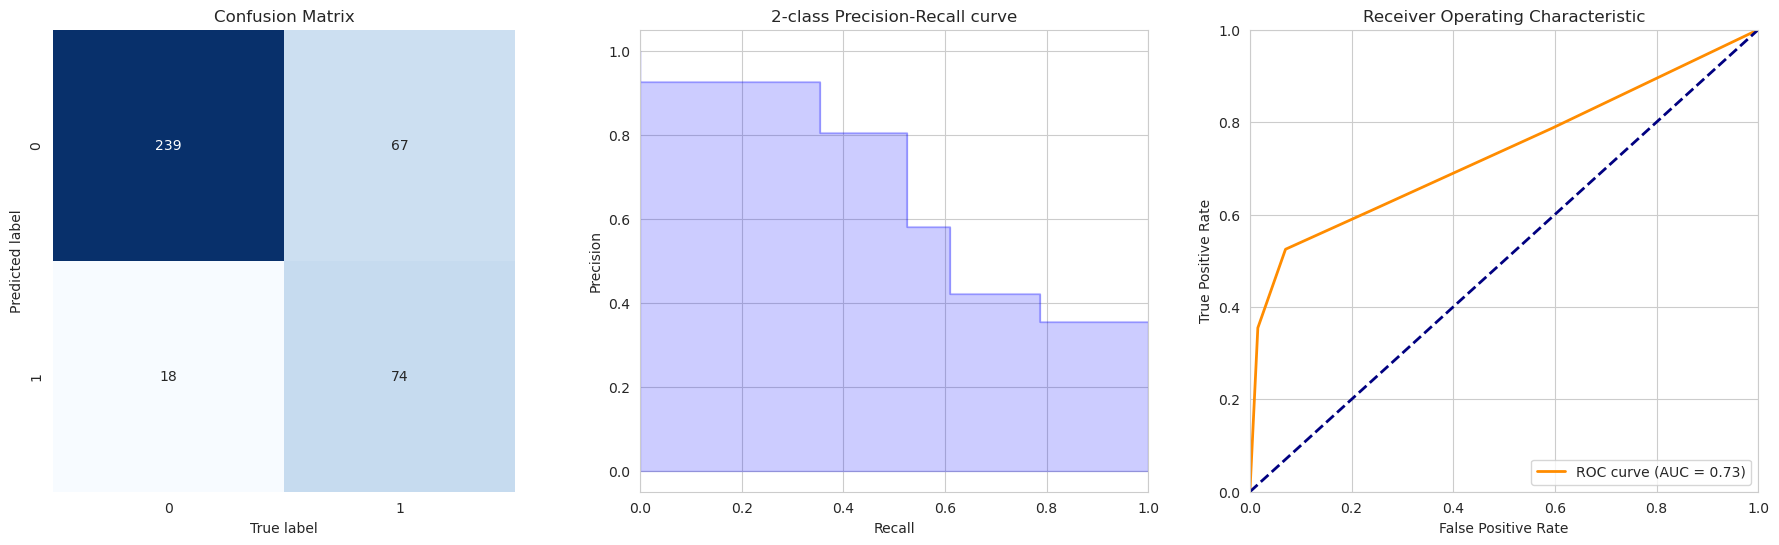

In [47]:
# Train the knn model on the training data with the best hyperparameters found
knn_best.fit(X_train, y_train)

# Generate predicted probabilities of the positive class for the testing data
pred_knn = knn_best.predict_proba(X_test)[:, 1]

# Print a summary report of the model's performance on the testing data
show_summary_report(y_test, pred_knn)

### 5. Naive Bayes

- var_smoothing : This hyperparameter is used to avoid the problem of zero variance. It is added to the variance of every feature in the dataset, which improves the numerical stability of the algorithm.

In [48]:
# Define the naive bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Naive Bayes accuracy:', round(accuracy, 4))
print('Naive Bayes confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Naive Bayes classification report:\n', classification_report(y_test, y_pred))

Naive Bayes accuracy: 0.7236
Naive Bayes confusion matrix:
 [[215  42]
 [ 68  73]]
Naive Bayes classification report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       257
           1       0.63      0.52      0.57       141

    accuracy                           0.72       398
   macro avg       0.70      0.68      0.68       398
weighted avg       0.72      0.72      0.72       398



In [49]:
# Define the hyperparameter grid to search over
nb_params = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Perform grid search cross-validation to find the best hyperparameters
grid_nb = GridSearchCV(nb, nb_params, cv=5)
grid_nb.fit(X_train, y_train)
nb_best = grid_nb.best_estimator_

# Print the best hyperparameters and score found during the grid search
print("Best parameters:", nb_best)
print("Best Accuracy Score: {:.2f}%".format(grid_nb.best_score_ * 100))

Best parameters: GaussianNB(var_smoothing=1e-10)
Best Accuracy Score: 75.01%


Accuracy : 0.72 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.63 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.52 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.73                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


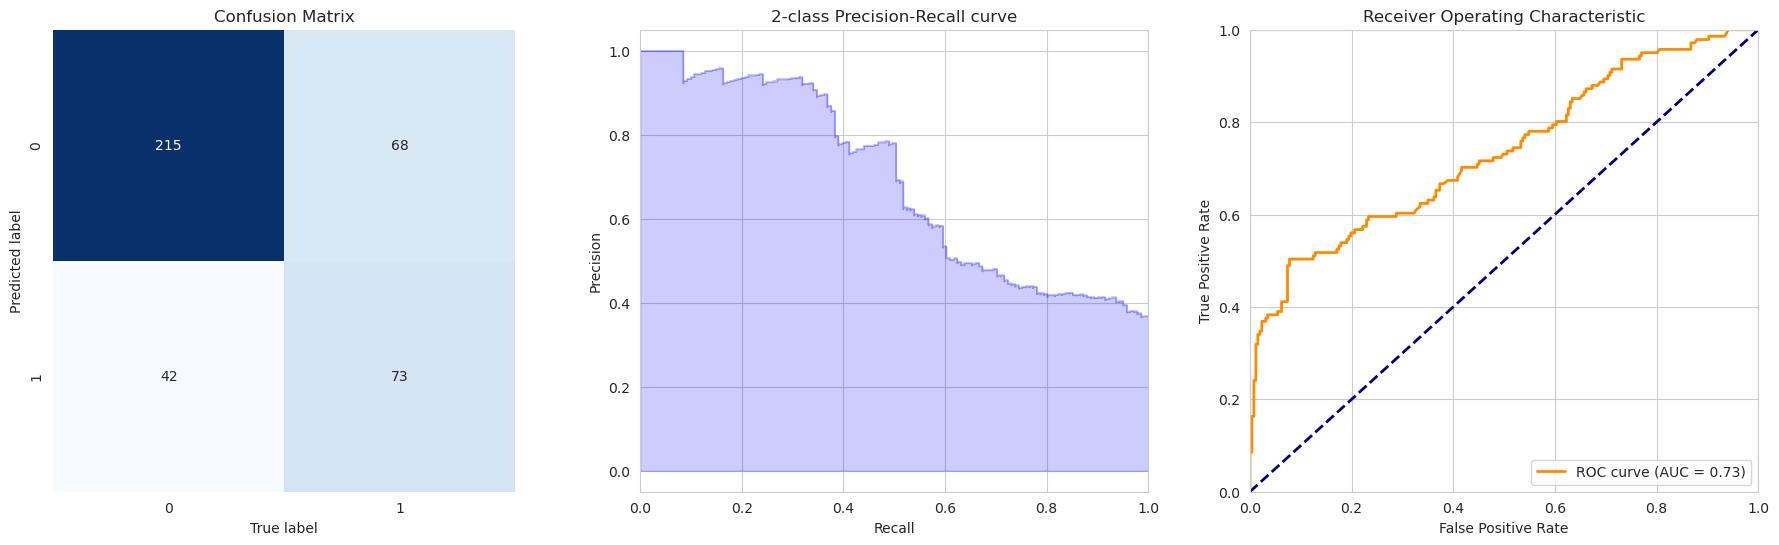

In [50]:
# Train the naive bayes model on the training data with the best hyperparameters found
nb_best.fit(X_train, y_train)

# Generate predicted probabilities of the positive class for the testing data
pred_nb = nb_best.predict_proba(X_test)[:, 1]

# Print a summary report of the model's performance on the testing data
show_summary_report(y_test, pred_nb)

### 6. Support Vector Machines (SVM)

- C: The Penalty parameter C of the error term.

- Kernel: Kernel type could be linear or rbf.

- gamma: The kernel coefficient that controls the shape of the decision boundary.

In [51]:
# Define the support vector machines model
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Support Vector Machines  accuracy:', round(accuracy, 4))
print('Support Vector Machines  confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Support Vector Machines  classification report:\n', classification_report(y_test, y_pred))

Support Vector Machines  accuracy: 0.7236
Support Vector Machines  confusion matrix:
 [[215  42]
 [ 68  73]]
Support Vector Machines  classification report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       257
           1       0.63      0.52      0.57       141

    accuracy                           0.72       398
   macro avg       0.70      0.68      0.68       398
weighted avg       0.72      0.72      0.72       398



In [52]:
# Define the hyperparameter grid to search over
svc_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.0001]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_svc = GridSearchCV(svc, svc_params, cv=5, verbose=1)
grid_svc.fit(X_train, y_train)
svc_best = grid_svc.best_estimator_

# Print the best hyperparameters and score found during the grid search
print("Best parameters:", svc_best)
print("Best Accuracy Score: {:.2f}%".format(grid_svc.best_score_ * 100))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: SVC(C=1, gamma=0.001, kernel='linear', probability=True)
Best Accuracy Score: 75.27%


Accuracy : 0.75 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.76 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.42 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.70                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


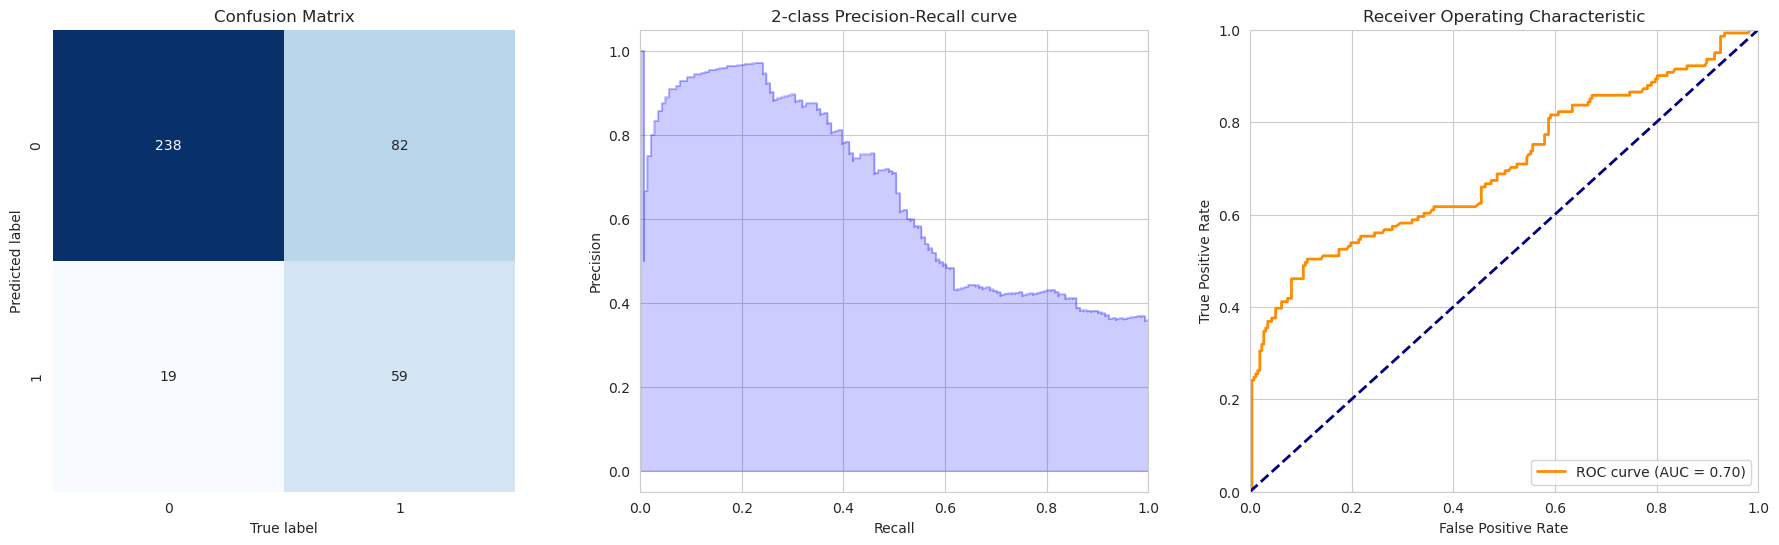

In [53]:
# Train the svc model on the training data with the best hyperparameters found
svc_best.fit(X_train, y_train)

# Generate predicted probabilities of the positive class for the testing data
pred_svc = svc_best.predict_proba(X_test)[:, 1]

# Print a summary report of the model's performance on the testing data
show_summary_report(y_test, pred_svc)

## Plot the ROC curve for all models

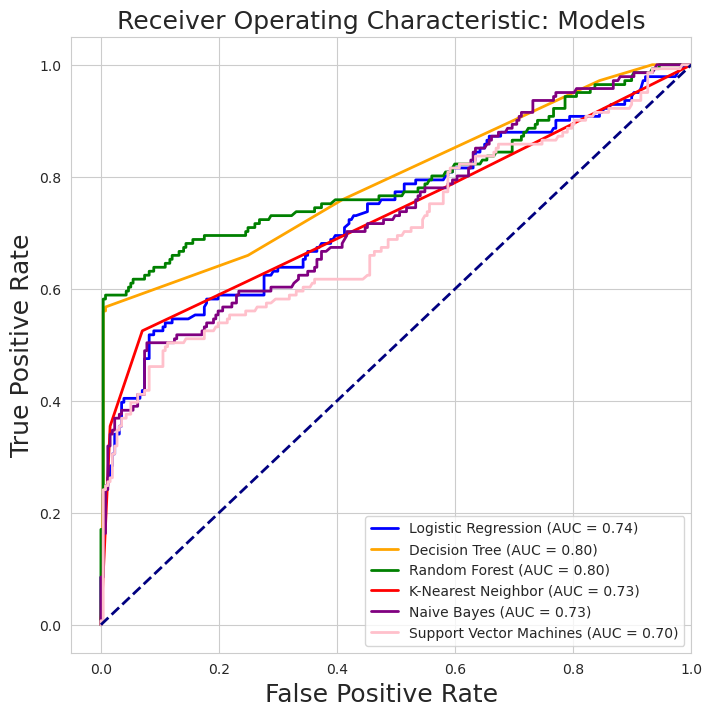

In [54]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
y_pred1 = lr_best.predict_proba(X_test)[:, 1] # Logistic Regression model
y_pred2 = dt_best.predict_proba(X_test)[:, 1] # Decision Tree model
y_pred3 = rf_best.predict_proba(X_test)[:, 1] # Random Forest model
y_pred4 = knn_best.predict_proba(X_test)[:, 1] # K-Nearest Neighbor model
y_pred5 = nb_best.predict_proba(X_test)[:, 1] # Naive Bayes model
y_pred6 = svc_best.predict_proba(X_test)[:, 1] # Support Vector Machines model

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred1)
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred2)
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred3)
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred4)
fpr5, tpr5, _ = metrics.roc_curve(y_test, y_pred5)
fpr6, tpr6, _ = metrics.roc_curve(y_test, y_pred6)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc1 = metrics.auc(fpr1, tpr1)
roc_auc2 = metrics.auc(fpr2, tpr2)
roc_auc3 = metrics.auc(fpr3, tpr3)
roc_auc4 = metrics.auc(fpr4, tpr4)
roc_auc5 = metrics.auc(fpr5, tpr5)
roc_auc6 = metrics.auc(fpr6, tpr6)

# Plot the ROC Curve
plt.figure(figsize=[8,8])
lw = 2
plt.plot(fpr1, tpr1, color='blue', lw = lw, label = 'Logistic Regression (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='orange', lw = lw, label = 'Decision Tree (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='green', lw = lw, label = 'Random Forest (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='red', lw = lw, label = 'K-Nearest Neighbor (AUC = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, color='purple', lw = lw, label = 'Naive Bayes (AUC = %0.2f)' % roc_auc5)
plt.plot(fpr6, tpr6, color='pink', lw = lw, label = 'Support Vector Machines (AUC = %0.2f)' % roc_auc6)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: Models', fontsize=18)
plt.legend(loc="lower right")
plt.show()

- Findings: Random Forest model provided the best AUC value of 0.80.

## Comparison of Different Algorithms

In [55]:
# Accuracy score for different algorithms
Accuracy_lr = round(accuracy_score(y_test, lr_best.predict(X_test)) * 100, 2) #Logistic Regression
Accuracy_dt = round(accuracy_score(y_test, dt_best.predict(X_test)) * 100, 2) #Decision Tree
Accuracy_rf = round(accuracy_score(y_test, rf_best.predict(X_test)) * 100, 2) #Random Forest
Accuracy_knn = round(accuracy_score(y_test, knn_best.predict(X_test)) * 100, 2) #K-Nearest Neighbor
Accuracy_nb = round(accuracy_score(y_test, nb_best.predict(X_test)) * 100, 2) #Naive Bayes
Accuracy_svc = round(accuracy_score(y_test, svc_best.predict(X_test)) * 100, 2) #Support Vector Machines

models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbor','Naive Bayes', 'Support Vector Machines'],
    'Accuracy Score' : [f"{Accuracy_lr:.2f}%", f"{Accuracy_dt:.2f}%", f"{Accuracy_rf:.2f}%", f"{Accuracy_knn:.2f}%", f"{Accuracy_nb:.2f}%", f"{Accuracy_svc:.2f}%"]
})

models.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
2,Random Forest,84.67%
1,Decision Tree,84.17%
3,K-Nearest Neighbor,78.64%
0,Logistic Regression,76.88%
5,Support Vector Machines,74.62%
4,Naive Bayes,72.36%


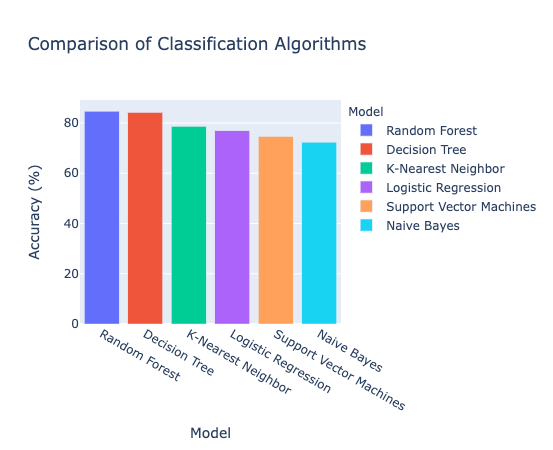

In [56]:
# Create a DataFrame with the model names and accuracy scores
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbor','Naive Bayes', 'Support Vector Machines'],
    'Accuracy Score' : [Accuracy_lr, Accuracy_dt, Accuracy_rf, Accuracy_knn, Accuracy_nb, Accuracy_svc]
})

# Sort the models DataFrame by accuracy score in descending order
models = models.sort_values(by='Accuracy Score', ascending=False)

# Create a bar chart using px.bar
fig = px.bar(
    data_frame=models,
    x='Model',
    y='Accuracy Score',
    color='Model',
    title='Comparison of Classification Algorithms',
    labels={'Accuracy Score': 'Accuracy (%)'}
)

fig.show()


## Ensemble Methods

Voting Ensemble

 - Increased Accuracy: achieve higher accuracy than any individual model on its own.

- Robustness: more robust than individual models, since they can help to smooth out errors or outliers in individual predictions.

- Diversity: capture a wider range of patterns and relationships in the data, since they combine models that have been trained using different algorithms, features, or hyperparameters.

- Simple to Implement: relatively simple to implement and can be used with a wide range of machine learning algorithms.

In [57]:
from sklearn.ensemble import VotingClassifier

# Define the base models

model1 = LogisticRegression()

model2 = DecisionTreeClassifier()

model3 = RandomForestClassifier()

model4 = KNeighborsClassifier()

model5 = GaussianNB()

model6 = SVC() 

In [58]:
# Create the sub models
estimators = [('LR',model1), ('DT',model2), ('RF',model3), 
              ('KNN',model4), ('NB',model5), ('SVC',model6)]

In [59]:
# Define the ensemble model using the VotingClassifier
ensemble = VotingClassifier(estimators, voting='hard')

# Evaluate the ensemble model using cross-validation
scores = cross_val_score(ensemble, X_train, y_train, cv=5)
print('Accuracy on training set:', round(scores.mean() * 100, 2), '%')

# Fit the ensemble model on the training data and make predictions on the test data
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

# Evaluate the performance of the ensemble model on the test data
accuracy = (y_test == y_pred).mean()
print('Accuracy on test set:', round(accuracy * 100, 2), '%')


Accuracy on training set: 80.43 %
Accuracy on test set: 80.15 %


- Findings: 
 
 - The accuracy on the training set is 80.43%, indicating that the model is reasonably good at fitting the training data.

 - The accuracy on the test set is 80.15%, indicating that the model is also performing reasonably well on new, unseen data.

 - The small difference between the accuracy on the training set and the accuracy on the test set suggests that the model is not overfitting to the training data.

## Conclusion:

- We applied six different classification models, including Logistic Regression(LR), Decison Tree(DT), Random Forest(RF), K-Nearest Neighbor(KNN), Naive Bayes(NB), and Support Vector Machines(SVC) to classify the data and determined that the Random Forest model provided the best accuracy score of 84.67% and AUC value, making it the recommended model for further use.

- The K-Nearest Neighbor(KNN) model provided the best baseline score of 79.11%.

- Feature engineering, such as creating new features based on domain knowledge or using techniques like PCA or LDA, could be further explored to improve the model's performance.

- In addition to feature engineering, adding more data to the dataset could help improve the model's accuracy and prevent overfitting.

- In the future, more advanced modeling techniques like deep learning could be explored to further improve the model's accuracy, or other areas of the model such as parameter tuning or algorithm selection could be investigated.

 ## Recommendation for Business Team: 
 
 - Explore the data to identify patterns and insights that can inform the development of the travel insurance package and marketing strategies.

 - Investigate the importance of different features in predicting customer purchase of the travel insurance package to identify key factors influencing customer decisions and inform marketing strategies.

 - Monitor and retrain the machine learning models periodically to ensure they remain accurate and up-to-date, to market the package effectively to the most relevant customers.

 - Use targeted marketing campaigns to reach customers who are most likely to be interested in the travel insurance package, based on the predictions of the machine learning model, to maximize the effectiveness and ROI of marketing efforts.

 - Consider using additional data sources, such as social media or web browsing behavior, to better understand customer preferences and interests.

 - Conduct A/B testing to compare the effectiveness of different marketing strategies and tactics in promoting the travel insurance package.

 - Regularly evaluate the success of the travel insurance package and adjust marketing strategies as necessary to optimize performance and achieve business goals.

## References:

https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data?datasetId=1457162&sortBy=voteCount (Dataset)

https://www.kaggle.com/code/pouryaayria/a-complete-ml-pipeline-tutorial-acu-86 (ML Pipeline Tutorial)